In [14]:
import numpy as np
import matplotlib.pylab as plt

In [6]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    return grad

In [19]:
def numerical_gradient(f,X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f,x)
        return grad

In [20]:
def gradient_descent_(f, init_x, lr=0.01,step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr * grad
    return x

In [21]:
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2,axis=1)

In [22]:
init_x = np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x, lr=0.1, step_num=100)

array([ -6.11110793e-10,   8.14814391e-10])

In [32]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []
    
    for i in range(step_num):
        x_history.append(x.copy())
        
        grad = numerical_gradient(f,x)
        x -= lr * grad
        
    return x, np.array(x_history)

In [61]:
init_x = np.array([-3.0, 4.0])

lr = 0.1
step_num = 20
x,x_history = gradient_descent(function_2,init_x,lr=lr,step_num=step_num)

In [62]:
plt.plot([-5,5],[0,0],'--b')
plt.plot([0,0],[-5,5],'--b')
plt.plot(x_history[:,0], x_history[:,1],'o')

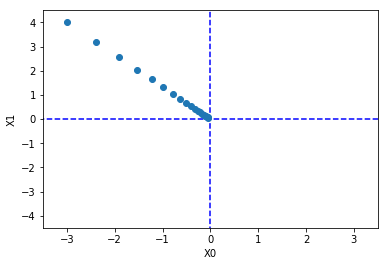

In [63]:
plt.xlim(-3.5,3.5)
plt.ylim(-4.5,4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()